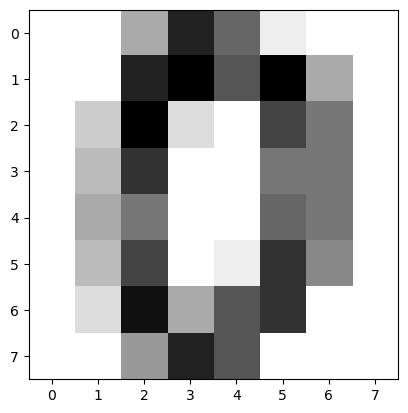

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [6]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9611111111111111
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  1]
 [ 0  0  0  0 33  0  0  0  2  0]
 [ 0  0  0  0  0 44  0  0  0  2]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  0  0  1  0  0  0 35  1]
 [ 0  0  0  1  0  0  0  1  1 28]]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [10]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


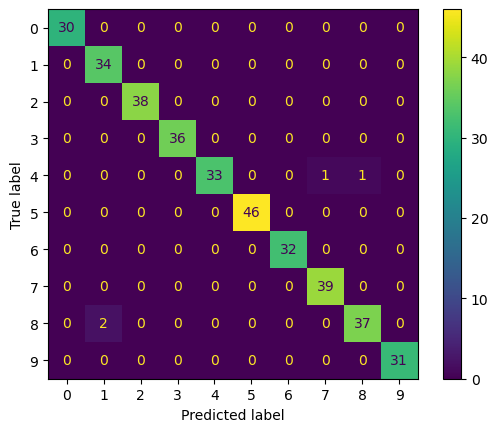

In [11]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# SVM 모델 학습 및 평가
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM confusion matrix:")
print(svm_cm)

SVM confusion matrix:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  2  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 37  1]
 [ 0  0  0  0  0  0  0  1  0 30]]


In [14]:
clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

1.0


In [15]:
# Decision Tree 모델 학습 및 평가
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
print("Decision Tree confusion matrix:")
print(dt_cm)

Decision Tree confusion matrix:
[[27  0  1  0  0  0  0  0  1  1]
 [ 1 30  1  0  1  0  0  0  1  0]
 [ 1  2 28  2  0  0  0  2  3  0]
 [ 0  1  0 29  0  2  0  1  1  2]
 [ 1  1  0  0 29  0  0  2  0  2]
 [ 0  0  0  1  2 36  2  0  4  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  1  1  0  0 36  1  0]
 [ 0  3  1  2  0  0  0  0 32  1]
 [ 0  0  1  0  0  1  0  4  1 24]]


In [16]:
# Random Forest 모델 학습 및 평가
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest confusion matrix:")
print(rf_cm)

Random Forest confusion matrix:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  1  1  0]
 [ 0  0  0  0 33  0  0  1  1  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  1  0  0  0 36  1]
 [ 0  0  0  0  0  0  0  1  0 30]]


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
45/45 [==============================] - 0s 8ms/step - loss: 2.5592e-06 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9833
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 2.5089e-06 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9833
Epoch 3/100
45/45 [==============================] - 0s 6ms/step - loss: 2.4107e-06 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9833
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 2.3542e-06 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9833
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2803e-06 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9833
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2446e-06 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9833
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 2.1639e-06 - accuracy: 1.0000 - val_loss: 0.0822 - val_ac

45/45 [==============================] - 0s 5ms/step - loss: 5.9588e-07 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9861
Epoch 58/100
45/45 [==============================] - 0s 5ms/step - loss: 5.8642e-07 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9833
Epoch 59/100
45/45 [==============================] - 0s 5ms/step - loss: 5.6419e-07 - accuracy: 1.0000 - val_loss: 0.0846 - val_accuracy: 0.9833
Epoch 60/100
45/45 [==============================] - 0s 5ms/step - loss: 5.4735e-07 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9861
Epoch 61/100
45/45 [==============================] - 0s 6ms/step - loss: 5.4312e-07 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9833
Epoch 62/100
45/45 [==============================] - 0s 6ms/step - loss: 5.2570e-07 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9861
Epoch 63/100
45/45 [==============================] - 0s 6ms/step - loss: 5.1500e-07 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy

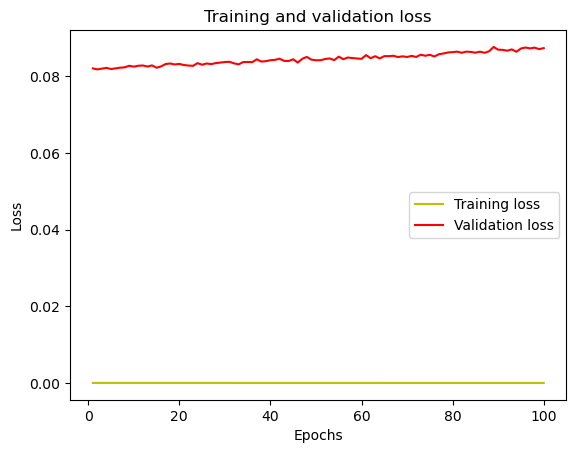

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

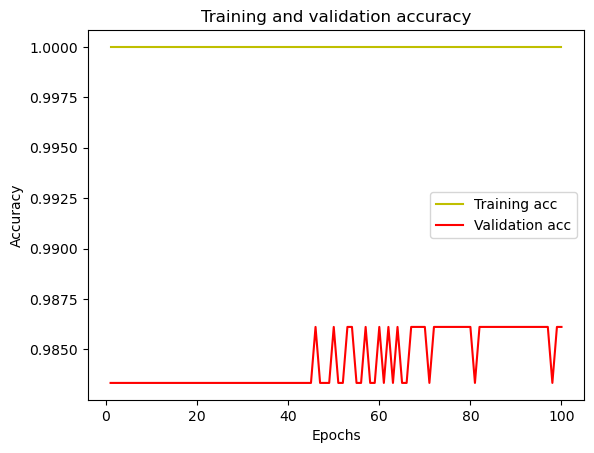

In [39]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

12/12 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9861
Test accuracy: 0.9861111044883728


In [41]:
import numpy as np

In [42]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

12/12 [==============================] - 0s 3ms/step


In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00        36
           4       1.00      0.97      0.99        35
           5       1.00      0.96      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      1.00      0.99        39
           8       0.97      0.97      0.97        39
           9       0.97      0.97      0.97        31

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

